# Алгоритмы классификации (продолжение)

In [1]:
# применить решающий лес
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# нарисовать график зависимости ошибки перекрестной проверки на тестовой части от числа деревьев (n_estimators). 
# Что означают и как влияют параметры criterion, max_depth, min_samples_split, min_samples_leaf ?

In [82]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from skimage import data
from skimage import filters
import skimage.morphology as skimor


import pandas as pd
import numpy as np

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import plotly.plotly as py
%matplotlib inline

In [3]:
# Загрузите обучающую выборку (признаки и метки классов)
data = pd.read_csv('train.csv').as_matrix()

In [4]:
d = data[np.random.choice(data.shape[0], 100)]
images = d[:, 1:]
labels = d[:, :1]

In [26]:
n = 5
k_fold = KFold(n_splits=n)
cv_data = k_fold.split(d)

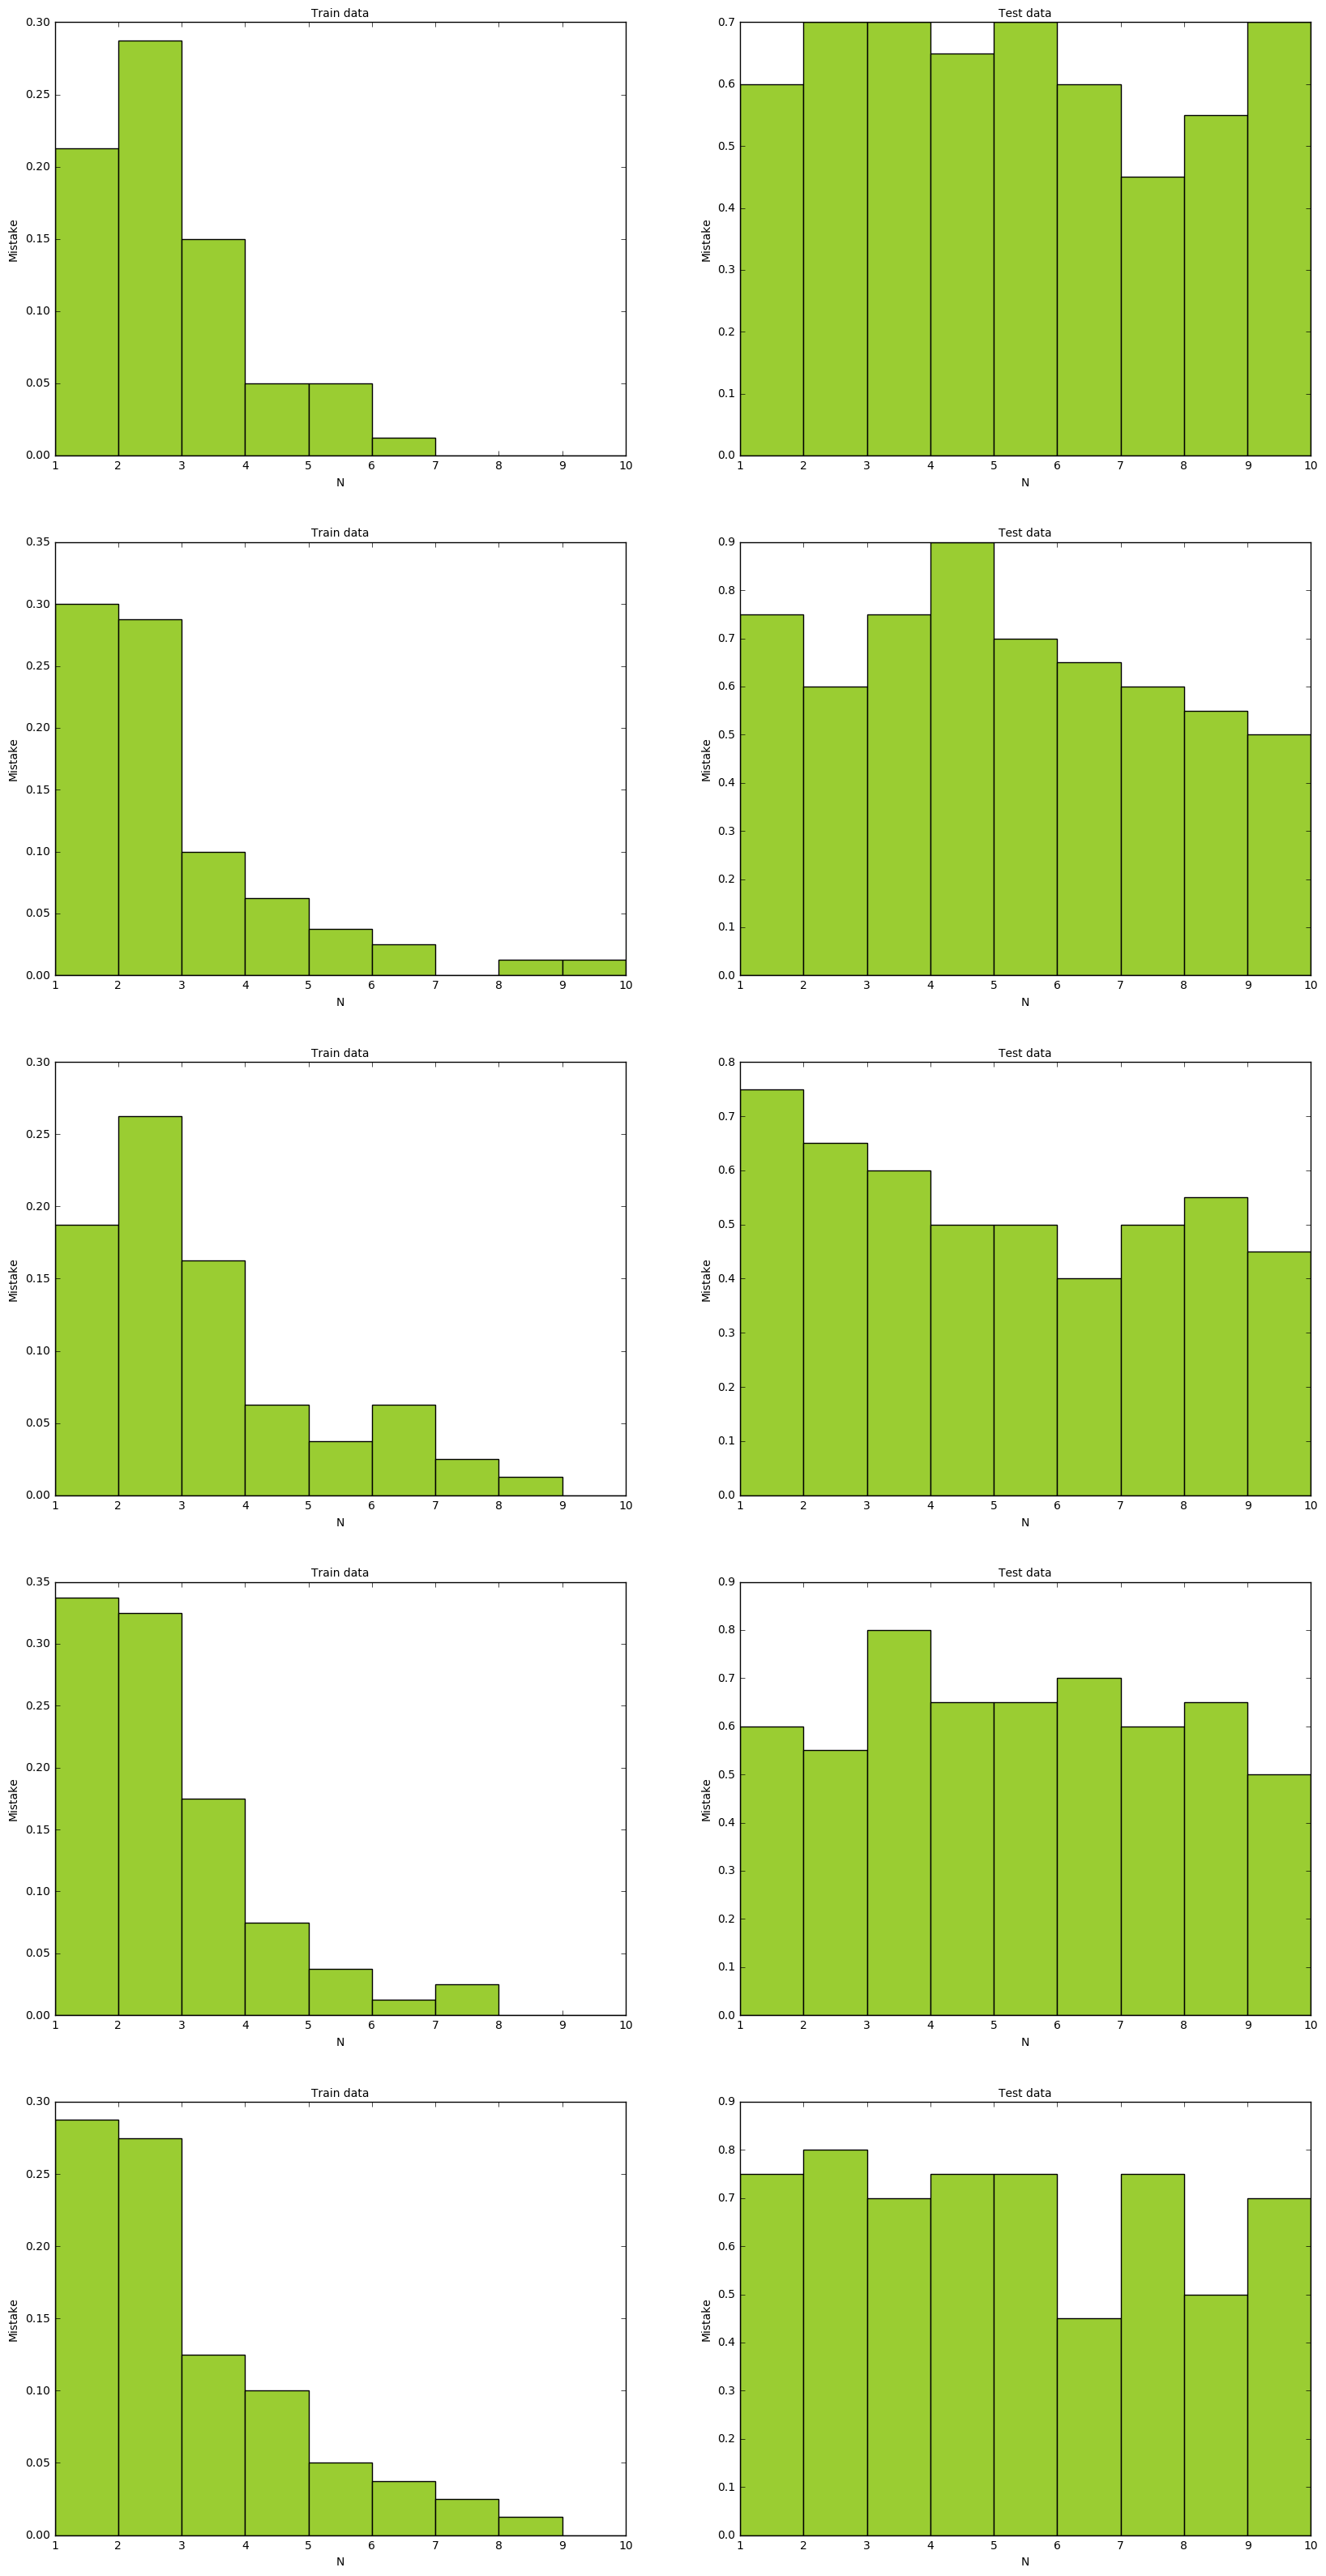

In [13]:
plt.figure(figsize=(20, 40))
train_predict = [[] for i in range(n)]
test_predict = [[] for i in range(n)]

im_cnt = 1
sector_cnt = 1
for train_index, test_index in cv_data:
    X_train, Y_train = images[train_index], labels[train_index]
    X_test, Y_test = images[test_index], labels[test_index]
    for i in range(1, 10):
        clf = RandomForestClassifier(n_estimators=i)
        clf.fit(X_train, Y_train.ravel())
        train_predict[sector_cnt - 1].append(1 - clf.score(X_train, Y_train))
        test_predict[sector_cnt - 1].append(1 - clf.score(X_test, Y_test))
    
    plt.subplot(n, 2, im_cnt)
    x = np.arange(1, 10)
    plt.bar(x, height=train_predict[sector_cnt - 1], width=1, color='yellowgreen')
    title_text = 'Train data'
    plt.title(title_text, size=10)
    plt.xlabel('N')
    plt.ylabel('Mistake')
    im_cnt += 1
    
    plt.subplot(n, 2, im_cnt)
    x = np.arange(1, 10)
    plt.bar(x, height=test_predict[sector_cnt - 1], width=1, color='yellowgreen')
    title_text = 'Test data'
    plt.xlabel('N')
    plt.ylabel('Mistake')
    plt.title(title_text, size=10)
    im_cnt += 1
    
    sector_cnt += 1

Исходя из графиков видим, что оптимальное число N это 7-8

In [15]:
X_train, Y_train = images[:90], labels[:90]
X_test, Y_test = images[-10:], labels[-10:]

criterion

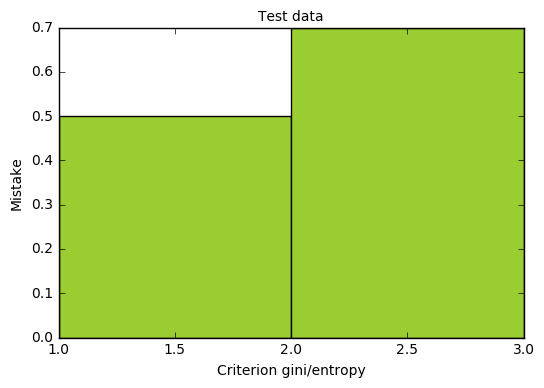

In [16]:
result = []

clf = RandomForestClassifier(criterion='gini')
clf.fit(X_train, Y_train.ravel())
result.append(1 - clf.score(X_test, Y_test))
    
clf = RandomForestClassifier(criterion='entropy')
clf.fit(X_train, Y_train.ravel())
result.append(1 - clf.score(X_test, Y_test))
    
plt.bar(range(1, len(result) + 1), height=result, width=1, color='yellowgreen')
title_text = 'Test data'
plt.title(title_text, size=10)    
plt.xlabel('Criterion gini/entropy')
plt.ylabel('Mistake')

max debth

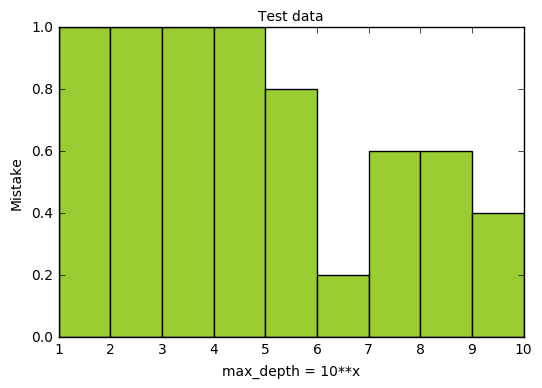

In [18]:
result = []

for i in range(-4, 5):
    clf = RandomForestClassifier(max_depth=10**i)
    clf.fit(X_train, Y_train.ravel())
    result.append(1 - clf.score(X_test, Y_test))
    
plt.bar(range(1, len(result) + 1), height=result, width=1, color='yellowgreen')
title_text = 'Test data'
plt.title(title_text, size=10)    
plt.xlabel('max_depth = 10**x')
plt.ylabel('Mistake')

min samples split

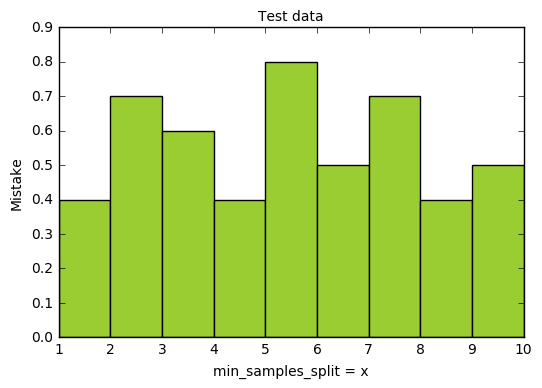

In [19]:
result = []

for i in range(2, 11):
    clf = RandomForestClassifier(min_samples_split=i)
    clf.fit(X_train, Y_train.ravel())
    result.append(1 - clf.score(X_test, Y_test))
    
plt.bar(range(1, len(result) + 1), height=result, width=1, color='yellowgreen')
title_text = 'Test data'
plt.title(title_text, size=10)    
plt.xlabel('min_samples_split = x')
plt.ylabel('Mistake')

min_samples_leaf

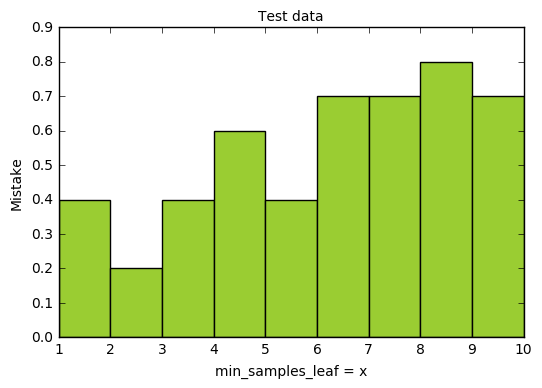

In [20]:
result = []

for i in range(2, 11):
    clf = RandomForestClassifier(random_state=42, min_samples_leaf=i)
    clf.fit(X_train, Y_train.ravel())
    result.append(1 - clf.score(X_test, Y_test))
    
plt.bar(range(1, len(result) + 1), height=result, width=1, color='yellowgreen')
title_text = 'Test data'
plt.title(title_text, size=10)    
plt.xlabel('min_samples_leaf = x')
plt.ylabel('Mistake')

In [2]:
# применить бустинг
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
# какие параметры и как влияют на качество классификации?

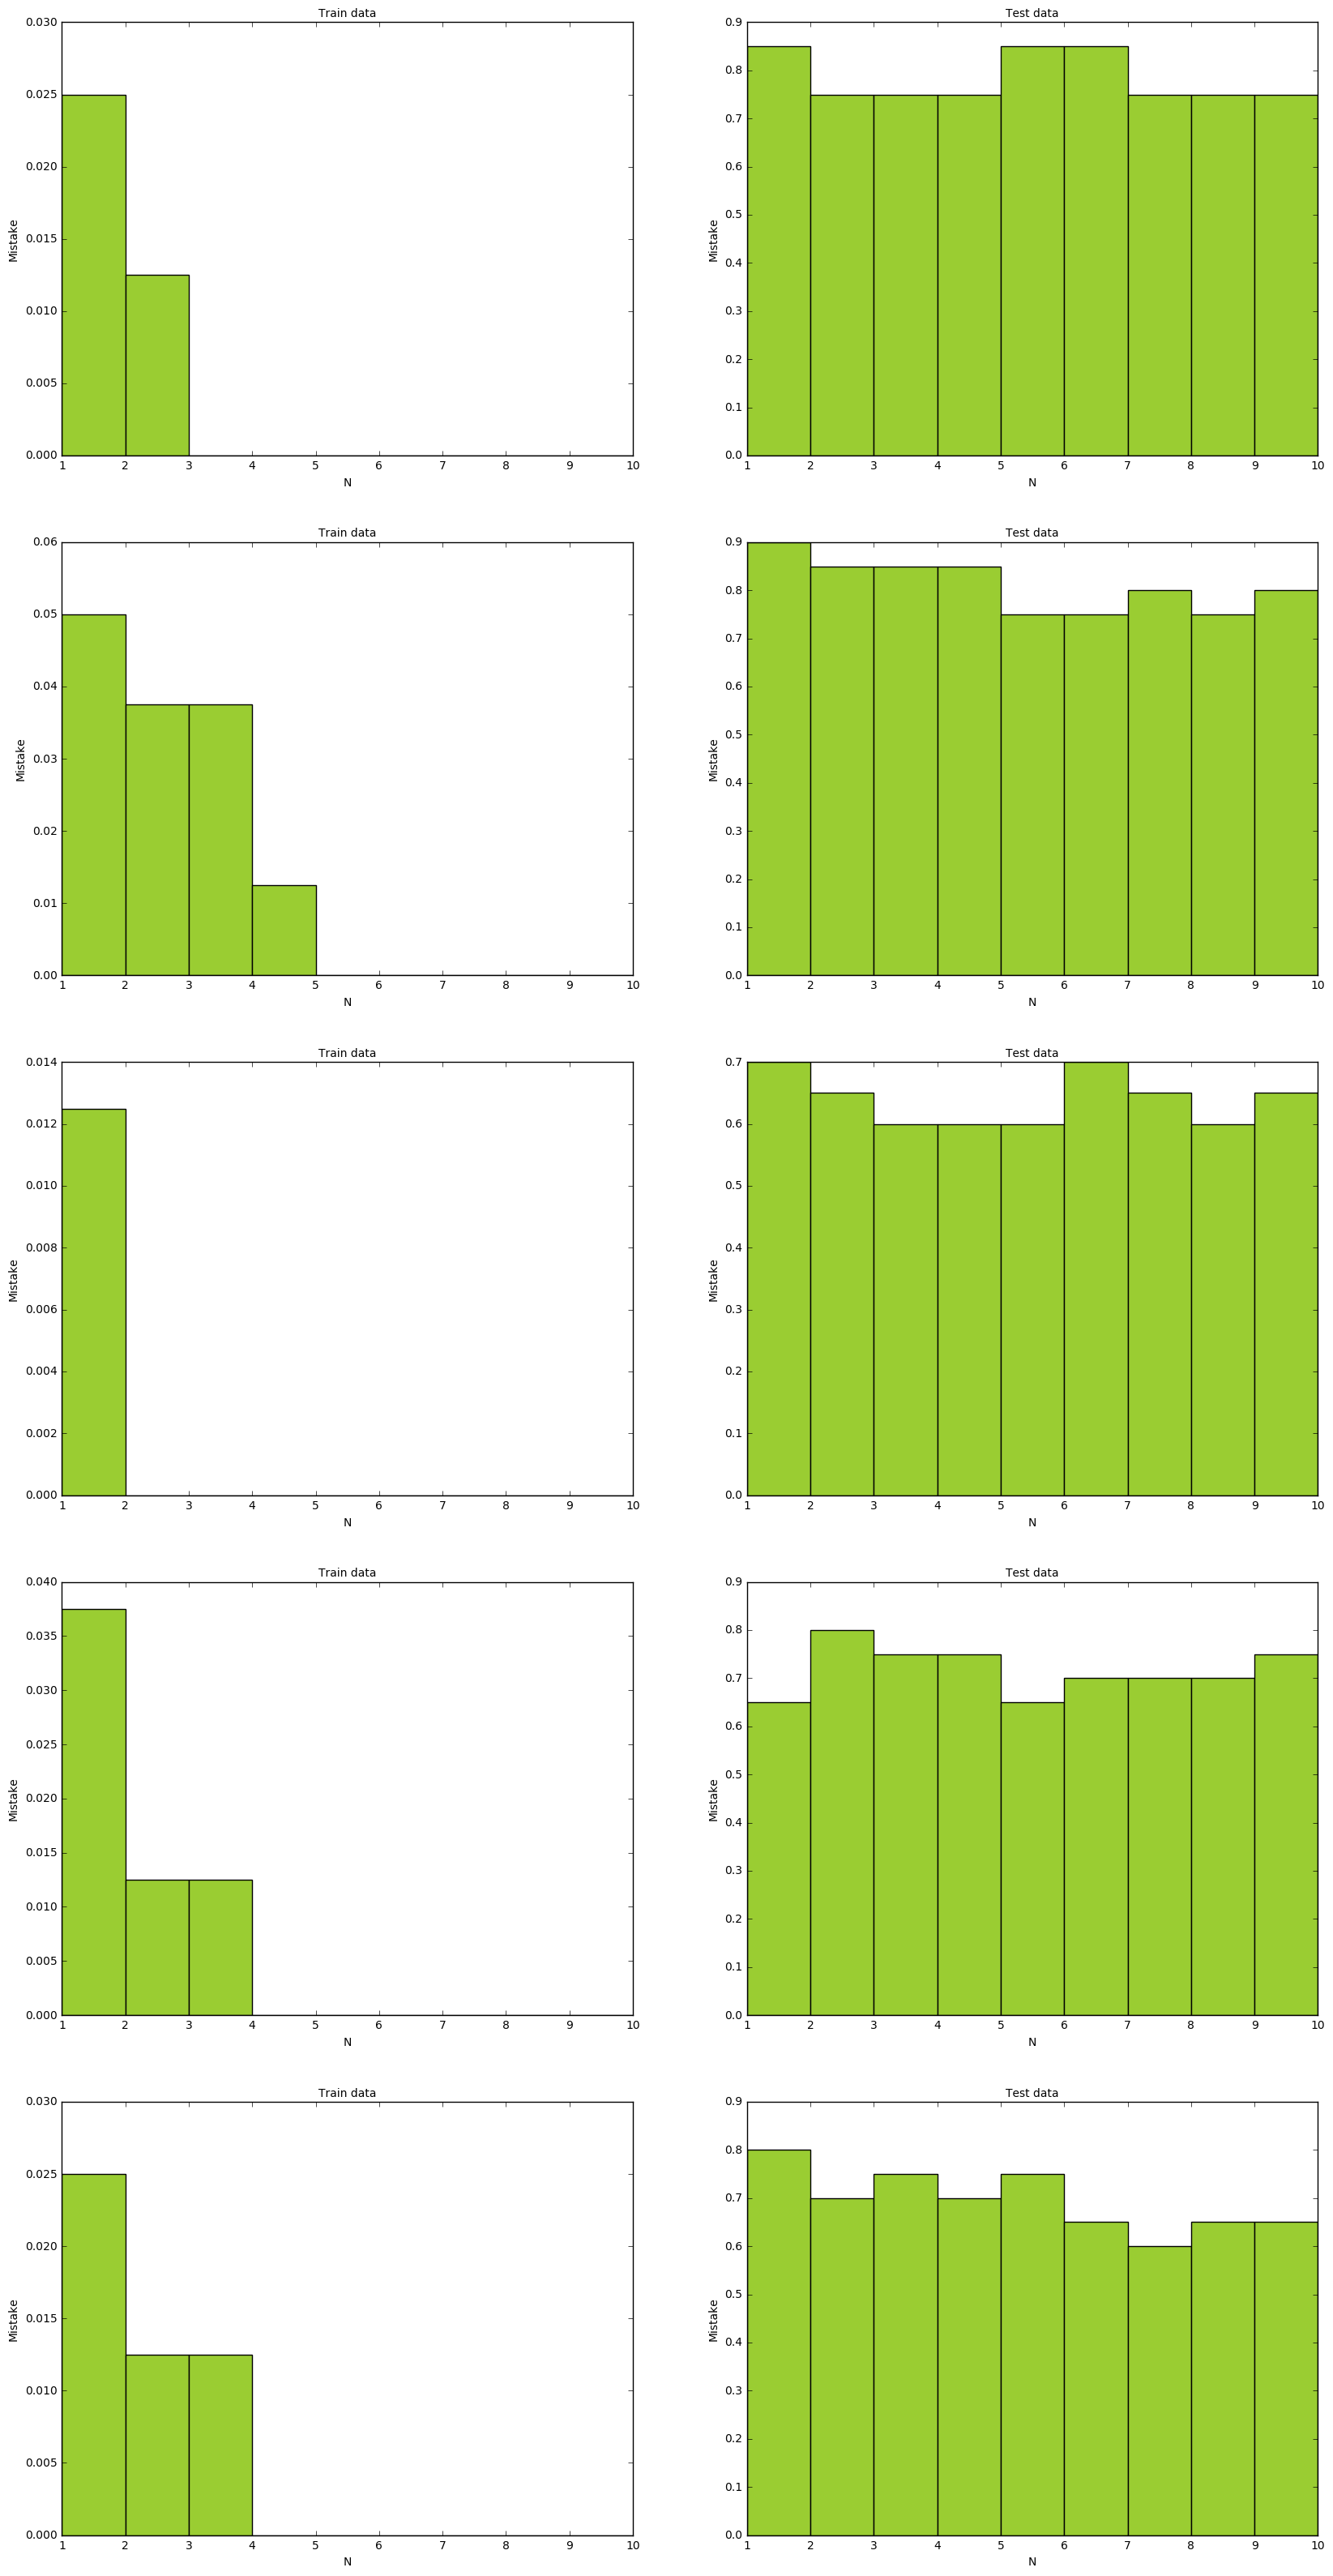

In [27]:
plt.figure(figsize=(20, 40))
train_predict = [[] for i in range(n)]
test_predict = [[] for i in range(n)]

im_cnt = 1
sector_cnt = 1
for train_index, test_index in cv_data:
    X_train, Y_train = images[train_index], labels[train_index]
    X_test, Y_test = images[test_index], labels[test_index]
    for i in range(1, 10):
        clf = GradientBoostingClassifier(n_estimators=i)
        clf.fit(X_train, Y_train.ravel())
        train_predict[sector_cnt - 1].append(1 - clf.score(X_train, Y_train))
        test_predict[sector_cnt - 1].append(1 - clf.score(X_test, Y_test))
    
    plt.subplot(n, 2, im_cnt)
    x = np.arange(1, 10)
    plt.bar(x, height=train_predict[sector_cnt - 1], width=1, color='yellowgreen')
    title_text = 'Train data'
    plt.title(title_text, size=10)
    plt.xlabel('N')
    plt.ylabel('Mistake')
    im_cnt += 1
    
    plt.subplot(n, 2, im_cnt)
    x = np.arange(1, 10)
    plt.bar(x, height=test_predict[sector_cnt - 1], width=1, color='yellowgreen')
    title_text = 'Test data'
    plt.xlabel('N')
    plt.ylabel('Mistake')
    plt.title(title_text, size=10)
    im_cnt += 1
    
    sector_cnt += 1

In [3]:
# Сделайте выводы о лучшем методе, среди рассмотренных на занятии 2 и 3.

Отметим, что уже на 3 уроке появился и показал меньшую ошибку RandomForestClassifier

# Работа с бинарными изображениями
## с помощью библиотеки http://scikit-image.org

In [4]:
# бинаризовать изображения, привести примеры картинок
# http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_thresholding.html

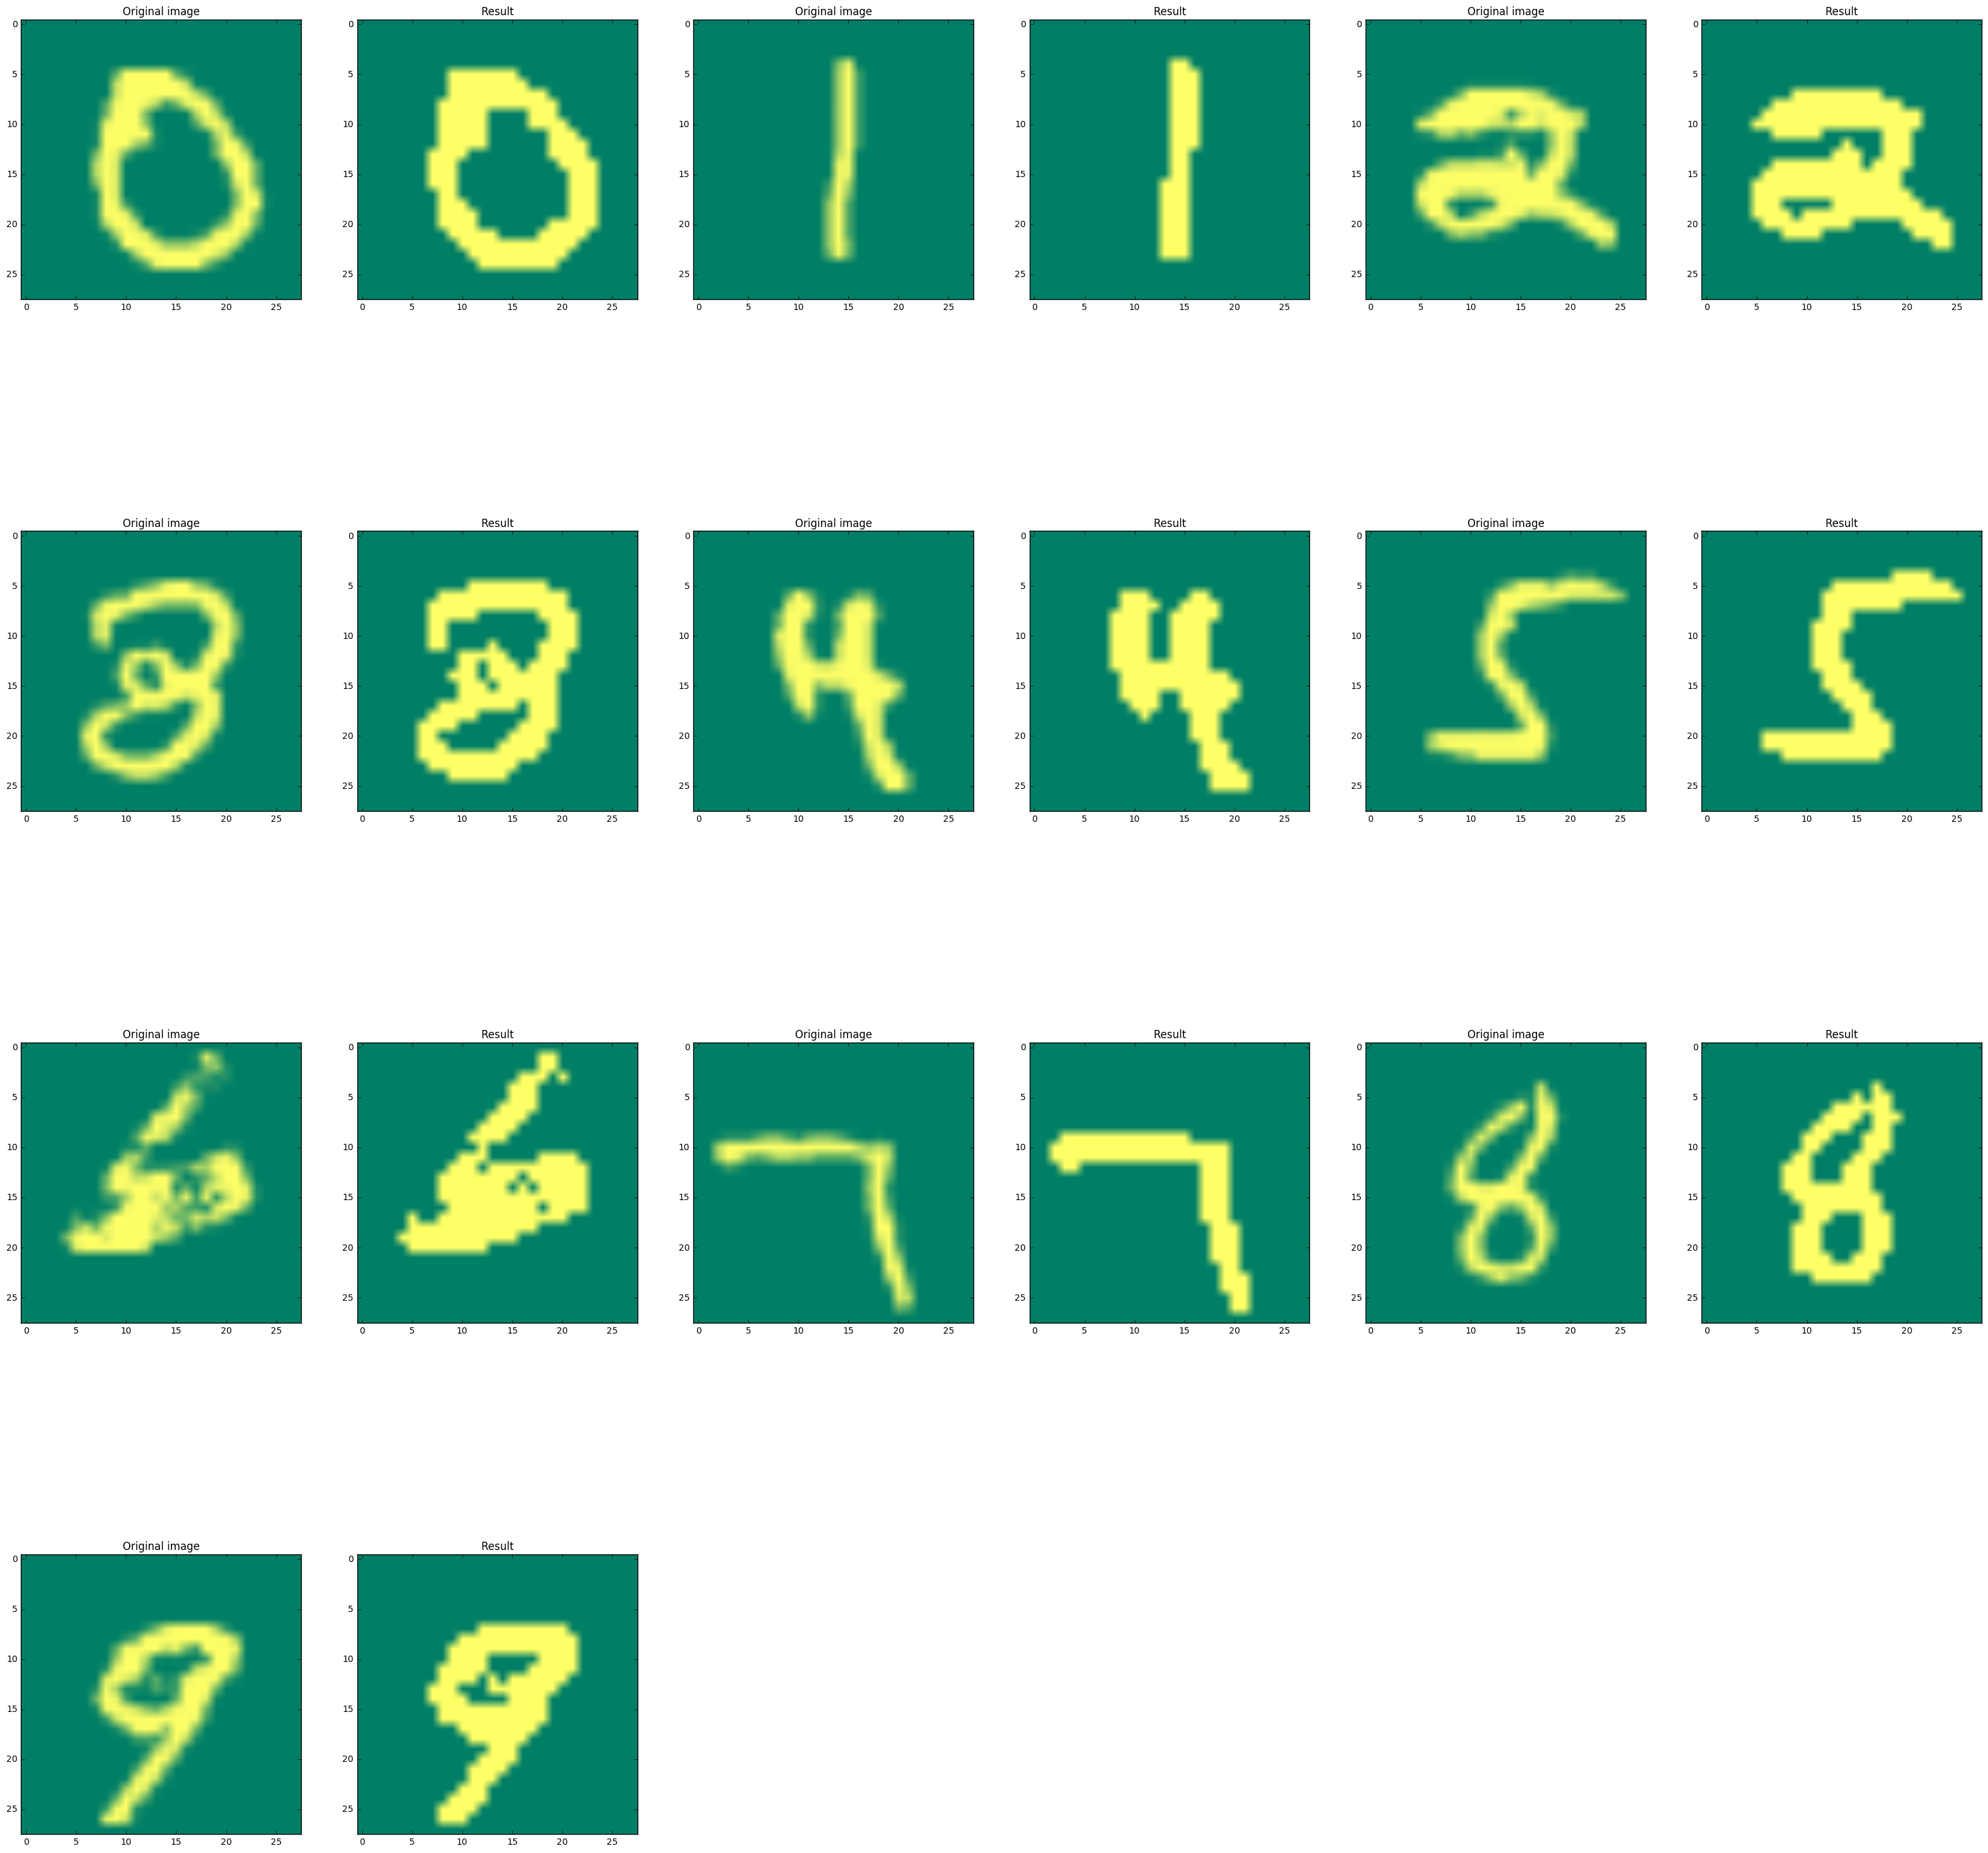

In [79]:
cnt = 1
plt.figure(figsize=(40, 40))

for i in range(10):
    for obj in d:
        image = obj[1:].reshape(28, 28)
        label = obj[0]
        if label == i:
            plt.subplot(4, 6, 2 * i + 1)
            plt.imshow(image, cmap="summer")
            plt.title('Original image')

            plt.subplot(4, 6, 2 * i + 2)
            plt.imshow(image > np.mean(image), cmap="summer")
            plt.title('Result')
            break

In [5]:
# выбрать несколько типичных изображений цифр и несколько не типичных (разомнутую 6, не связные из-за шума и т.п.)
# применить к ним замыкание и размыкание в разных вариантах и порядке
# выбрать наилучший вариант визуально, применить его ко всей выборке
# http://scikit-image.org/docs/dev/api/skimage.morphology.html

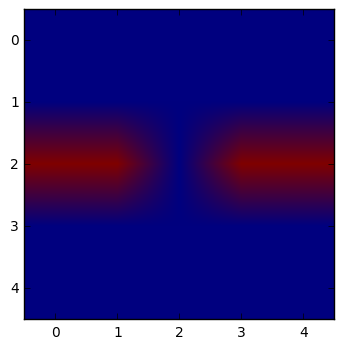

In [93]:
broken_line = np.array([[0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0],
                         [1, 1, 0, 1, 1],
                         [0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 0]], dtype=np.uint8)
plt.imshow(skimor.closing(broken_line))
plt.imshow(broken_line)

In [6]:
# построить скелеты изображений
# визуально выбрать лучшие параметры (skeletonize, medial_axis)
# нарисовать примеры результатов

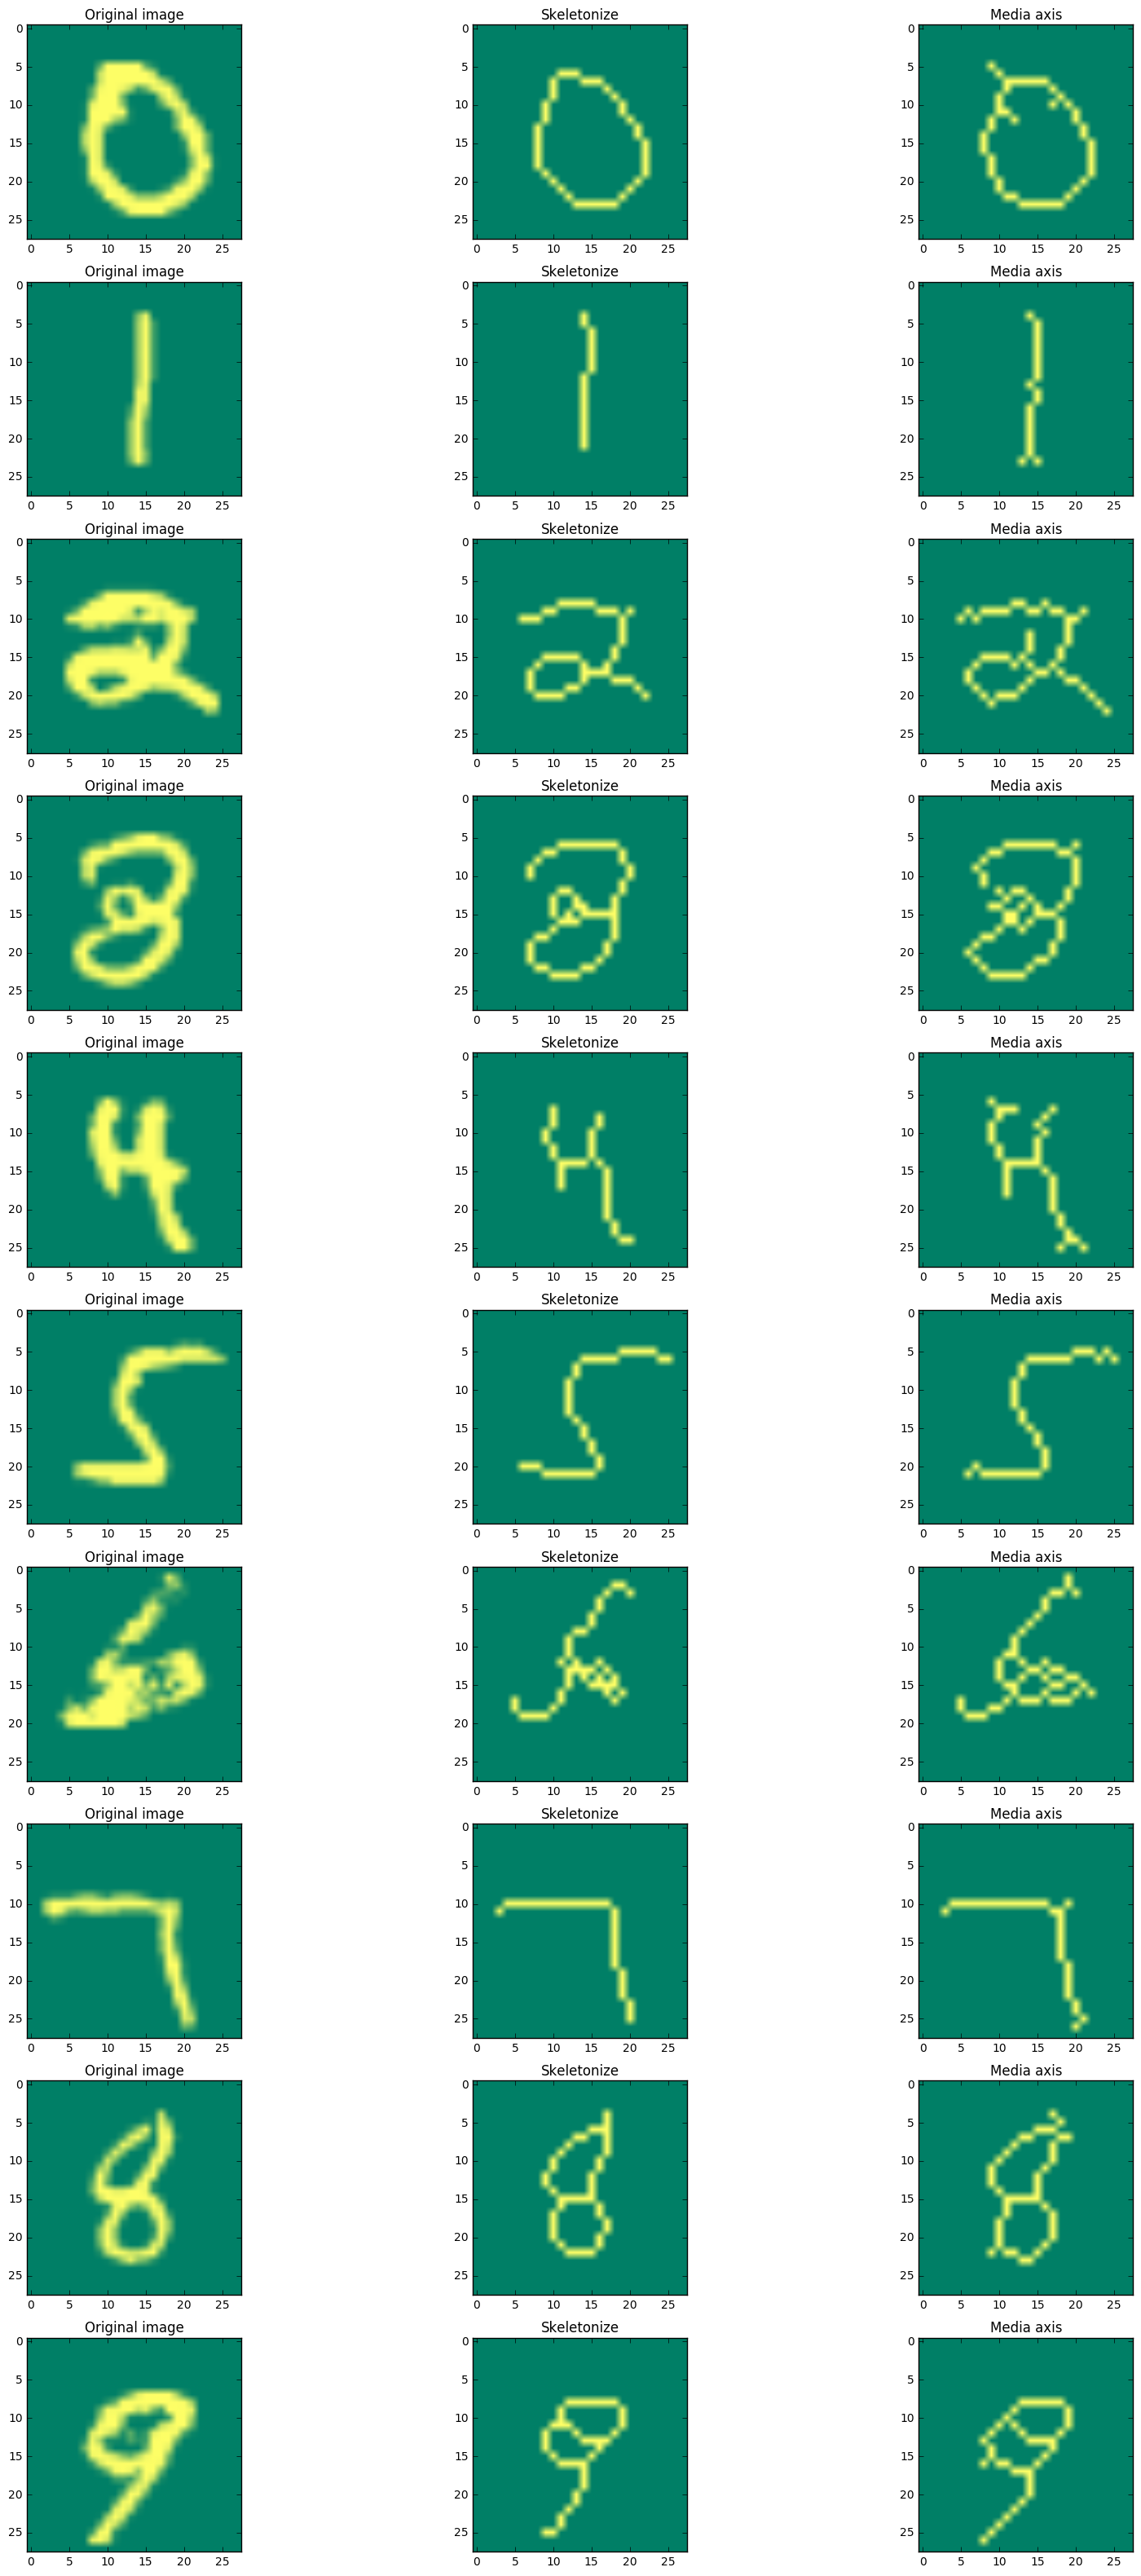

In [97]:
plt.figure(figsize=(20, 40))

for i in range(10):
    for obj in d:
        image = obj[1:].reshape(28, 28)
        label = obj[0]
        if label == i:
            plt.subplot(10, 3, 3 * i + 1)
            plt.imshow(image, cmap="summer")
            plt.title('Original image')

            plt.subplot(10, 3, 3 * i + 2)
            plt.imshow(skimor.skeletonize(image > np.mean(image)), cmap="summer")
            plt.title('Skeletonize')
            
            plt.subplot(10, 3, 3 * i + 3)
            plt.imshow(skimor.medial_axis(image > np.mean(image)), cmap="summer")
            plt.title('Media axis')
            break

In [7]:
# сгенерировать признаки по изображениям и их склетам (площадь, запас связности, ширина и т.д.)

In [8]:
# добавить ваши признаки к признаковому описанию и применить решающие дереья. Сравнить результат с результатом с занятия 2

# Метод главных компонент

In [9]:
# найти среднее изображение

In [10]:
# вычислить матрицу выборочной ковариации (сигма). Каково она размера?

In [11]:
# вычислить собственные векторы и собственные числа матрицы сигма. 
# Упорядочить их так, чтобы они располагались в порядке невозрастания собственных чисел,
# а собственные векторы были расположены по столбцу

In [12]:
# по графику кумулятивной суммы собственных чисел дать рекомендации по выбору размерности (0.9; 0.95; 0.99)

In [13]:
# нарисовать проекции нескольких цифр на аффинные пространства реккомендованной размерности. 
# Нарисовать проекции на пространства меньшей и большей размерности

In [ ]:
# Применить решающие деревья к выборке меньшей размерности (признаки --- главные координаты)
# Как изменилось качество?